In [1]:
using Pkg; Pkg.activate(".");
using Revise
using Statistics
import MUST
using PyPlot

MUST.@get_help_py stagger
MUST.@get_help visual 
MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2";

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/stagger2bifrost/Project.toml`


In [2]:
folder = "stagger_sun/"
model  = "t5777g44m0005";
snap_j = MUST.StaggerSnap(model, folder);

┌ Warning: bx not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: by not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332
┌ Warning: bz not present.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_stagger.jl:332


In [3]:
v = "TSOv7.1"

"TSOv7.1"

In [4]:
# The gas pressure is not saved in dispatch, so we use the same EOS for both to get it
eos_path = "input_data/solar_lte"
eos_path = "input_data/TSO_sun_Magg_v1"
eos_path = "input_data/TSO_sun_Magg_v3.1"
eos_path = "input_data/TSO_sun_Magg_v7.1"
sqEOS = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

In [5]:
b = MUST.Box(snap_j, eos=sqEOS);

┌ Info: Recomputing Energy from EoS.
└ @ MUST /cobra/ptmp/peitner/model_grid/MUST.jl/src/_atmos2legacy.jl:48


In [6]:
z = MUST.axis(b, :z)
d = MUST.plane_statistic(mean, b, :τ_ross)
plt.semilogy(z, d)

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2b0eb1e3cb80>

In [7]:
MUST.save(b; name="box_solar_stagger_$(v)", folder="")

"box_solar_stagger_TSOv7.1.hdf5"

In [8]:
stagger_τ  = MUST.height_scale(b, :τ_ross);

In [9]:
MUST.save(stagger_τ; name="box_solar_stagger_$(v)_t", folder="")

"box_solar_stagger_TSOv7.1_t.hdf5"

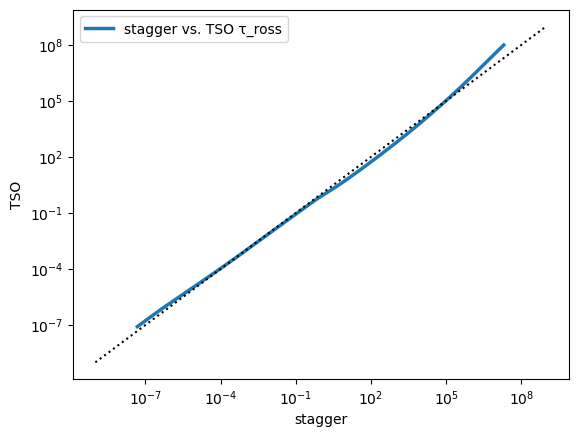

In [10]:
close()
d = MUST.plane_statistic(mean, b, :τ_ross)
z = MUST.plane_statistic(mean, b, :τ_ross_stag)
plt.plot(z, d, label="stagger vs. TSO τ_ross", lw=2.5)

x = exp10.(collect(range(-9.,9.,length=50)))
plt.plot(x, x, color="k", ls=":")

plt.yscale("log")
plt.xscale("log")

plt.xlabel("stagger")
plt.ylabel("TSO")
plt.legend()
gcf()